## Лабараторная работа 1
### Задание №1
![title](1.png)

*Импортируем все необходимие библиотеки*

In [89]:
%matplotlib inline
import warnings
from skimage.util.shape import view_as_windows
from skimage.io import imread, imshow
from skimage import img_as_float, img_as_ubyte
from numpy import clip
import numpy as np

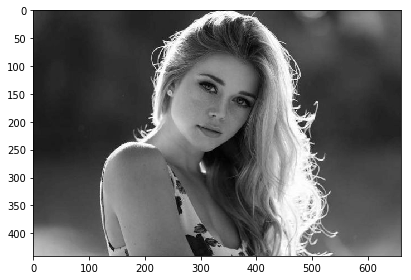

In [90]:
warnings.filterwarnings('ignore')
img = imread('img.png')[:, :, 0]
imshow(img)


# Считаем энтропию изображения
def entropy(img):
    values, _, = np.histogram(img.ravel(), bins=range(257))
    values = values / (img.shape[0] * img.shape[1])
    entropy = -sum(px * np.log2(px) for px in values if px != 0)
    return entropy


# Считаем среднеквадратичную ошибку двух изображений
def mse(img1, img2):
    sum_px = np.sum([(px1 - px2) ** 2 for px1, px2 in zip (img1, img2)])
    mse = np.sqrt(sum_px / (img1.shape[0] * img1.shape[1]))
    return mse

In [91]:
# Функция dimmin изменяет яркость изображения.
def kvant(img, coeff):
    return np.round(img / coeff)

def dimming(img, coeff):
    img = clip(img * coeff, 0, 255)
    return np.uint8(img)


Энтропия исходного изображения img = 7.471855931006415
Энтропия полученного изображения img2 = 3.5534573599904977
Среднеквадратичная ошибка изображений img и img2 = 4.606590512434069


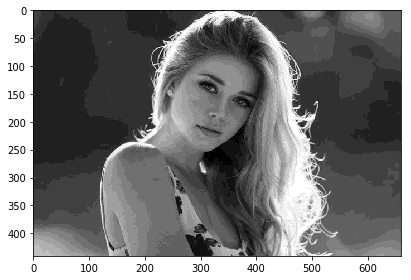

In [92]:
img2 = dimming(kvant(img, 16), 16)
imshow(img2)
print('Энтропия исходного изображения img = ' + str(entropy(img)))
print('Энтропия полученного изображения img2 = ' + str(entropy(img2)))
print('Среднеквадратичная ошибка изображений img и img2 = ' + str(mse(img, img2)))

### Задание 1.2
![title](2.png)

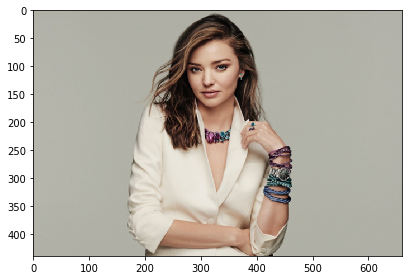

In [93]:
img = imread('img2.jpg')
imshow(img)

In [94]:
# yuv -> rgb
def yuv_to_rgb(img):
    img = img.astype('float')
    img[:, :, 1] -= 128
    img[:, :, 2] -= 128
    coeffs = [[1, 0, 1.402], [1, -0.34414, -0.71414], [1, 1.772, 0]]
    new_img = np.dot(img, np.transpose(coeffs))
    new_img = clip(new_img, 0, 255)
    return new_img.astype('uint8')

def decim(u):
    x, y = u.shape[0] // 2, u.shape[1] // 2
    t = view_as_windows(u, (2,2), step=2)
    temp = [[]]
    k = 0
    for elem in t:
        for i in elem:
            if k < y:
                temp[-1].append(int(i.mean()))
                k += 1
            else:
                k = 1
                temp.append([])
                temp[-1].append(int(i.mean()))
    new = np.array(np.repeat(np.repeat(temp, 2, axis=1), 2, axis=0))
    print(entropy(new))
    return new

def recovery(u, new):
    if u.shape[1] % 2 != 0 and u.shape[0] % 2 == 0:
        new = np.hstack((new, np.reshape(u[:, -1], (-1, 1))))
    if u.shape[1] % 2 == 0 and u.shape[0] % 2 != 0:
        new = np.vstack((new, np.reshape(u[-1, :], (1, -1))))
    if u.shape[1] % 2 != 0 and u.shape[0] % 2 != 0:
        new = np.vstack((new, np.reshape(u[-1, :], (1, -1))[-1][:-1]))
        new = np.hstack((new, np.reshape(u[:, -1], (-1, 1))))
    return new

# rgb -> yuv
def rgb_to_yuv(img):
    coeffs = [[0.299, 0.587, 0.114], [-0.1687, -0.3313, 0.5], [0.5, -0.4187, -0.0813]]
    new_img = np.dot(img, np.transpose(coeffs))
    new_img[:, :, 1] += 128
    new_img[:, :, 2] += 128
    return new_img.astype('uint8')

img2 = rgb_to_yuv(img)
img2 = np.uint8(np.dstack((img2[:, :, 0], recovery(img2[:, :, 1], decim(img2[:, :, 1])), recovery(img2[:, :, 1], decim(img2[:, :, 2])))))

2.9875336778991533
2.9995531320005444


Энтропия исходного изображения img = 12.771471837683892
Энтропия полученного изображения img2 = 13.003907394967289
Среднеквадратичная ошибка изображений img и img2 = 3.3135636189379722


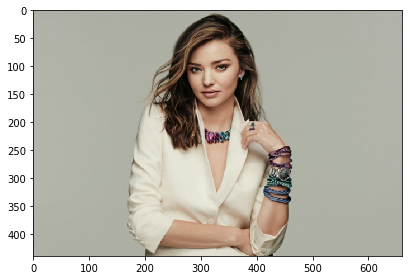

In [95]:
img2 = yuv_to_rgb(img2)
imshow(img2)
print('Энтропия исходного изображения img = ' + str(entropy(img)))
print('Энтропия полученного изображения img2 = ' + str(entropy(img2)))
print('Среднеквадратичная ошибка изображений img и img2 = ' + str(mse(img, img2)))

#### Вывод: 
Я получил знания по работе с изображениями, их каналами, яркостью и числом уровней яркости. Познакомился с функциями энтропии и среднейквадратичной ошибки. Так же был ознакомлен с квантованием, децимацией. Средняя квадратичная ошибка показывает, насколько в среднем  изображение до обработки отличается от изображения после обработки. Энтропия показывает, сколько в среднем нужно хранить бит для одного пикселя. Как мы видим из задания 1.2, после децимации изображения, энтропия слоев уменьшилась почти в 2 раза, однако после сборки изображения назад, энтропия становится почти такой-же.